<a href="https://colab.research.google.com/github/pacificspatial/Spatial_Data_Science_Bootcamp_Tokyo_2024/blob/main/hazuki-arakida/sds_bootcamp_2024_arakida.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **可視化クリニック（ハンズオン）**
Pacific Spatial Solutions 株式会社 荒木田葉月 2024/06/07</br>
</br>

## **はじめに**
今回のSpatial Data Science Bootcampの可視化クリニックのセクションでは、地理空間情報データを地図として可視化する際に気を付けるべきポイントや、2次元の地図と3次元の地図の表現方法の違いについて学びます。2次元の地図の描画には、Pythonのleafmapというライブラリを使用します。また3次元の地図の描画には、表現方法が豊かでかつ、高速で地図を描画することができるdeck.glというライブラリについてご紹介した後、deck.glをPythonで使用するためのライブラリ、pydeckの使用方法について学びます。</br>
</br>

## **１．可視化のポイント</br>**
地理空間情報を可視化する際にはどんな点に気を付けたらよいでしょう。まずはPythonライブラリ、leafmapを使用してデータを2次元の地図として表示してみましょう。</br>
</br>
【参考】leafmap: https://leafmap.org/</br>
</br>
### **leafmapを使用して、2次元の地図を描画する**

In [ ]:
##### leafmapライブラリをインストール
!pip install leafmap

In [ ]:
##### ライブラリを読み込む
import leafmap #leafmap: データ可視化ライブラリ
import pandas as pd #pandas: データ解析ライブラリ

In [ ]:
##### データを読み込んで地図に表示する
### データの読み込み
# データのURLを設定
KOKSEI_CHOUSA = ("https://bootcamp24.s3.ap-northeast-1.amazonaws.com/setaisu_tokyo.csv")

まずはどのようなデータか、確認してみましょう。

In [ ]:
# データを確認
df = pd.read_csv(KOKSEI_CHOUSA)
df

このデータは国勢調査のデータです。緯度経度の他、人口、世帯数などのデータが入っていることが分かります。
次に、緯度経度を地図上に表示してみます。
</br>
</br>
**leafmapで２次元の地図に描画してみましょう。**

In [ ]:
### 各種パラメータの設定
# 地図の初期表示状態を設定（表示範囲の中心点・ズームの設定）
m1 = leafmap.Map(center=(35.704166,139.48125), zoom=10)

# データをレイヤとして追加
m1.add_xy_data(
    KOKSEI_CHOUSA, #データ(URL)
    x="lng",       #経度
    y="lat",       #緯度
    layer_name="国勢調査", #レイヤ名
    label="Jinkou_Sousu"   #アイコンのラベルに使用するデータ
)

### 地図の表示
m1

>出典：2020年国勢調査3次メッシュ（政府統計の総合窓口(e-Stat [https://www.e-stat.go.jp/](https://www.e-stat.go.jp/)） を使用し、Pacific Spatial Solutions 株式会社が作成・加工したもの</br>


上の地図を見ると東京都のデータであることが分かります。地図を拡大したい位置にカーソルを持っていき、タッチパッド上で指二本を下に向かって動かしてみてください。拡大していくと、アイコンが規則正しく並んで表示されているのが分かります。国勢調査のデータは1km四方のメッシュデータとして整備されており、上で表示しているデータは各メッシュの中心点のデータです。各アイコンをクリックすると、地点ごとに人口総数のデータが表示されます。しかし、アイコンが並んでいるだけの状態では何を表しているか分かりません。</br>
では、地図を縮小（タッチパッド上で指二本を上に向かって動かす）していくとどのように表示が変わるでしょうか。点の表示方法がアイコンから色付きの円に変わり、縮小するたびに円の周辺の点の数が合計値として集計しなおされているのが分かります。しかし、可視化したいのは点の数ではなく、1点1点に紐づけられている国勢調査の人口等のデータです。</br>
</br>
**各地点の人口データを、円の大きさとして可視化してみましょう。**

In [ ]:
# 地図の表示位置とズームの設定
m2 = leafmap.Map(center=(35.704166,139.48125), zoom=10)

# 円の大きさを決めるパラメータを追加(人口総数の数に応じた大きさにする)
df["circle_size"]=df["Jinkou_Sousu"]/3000

# 人口総数のレイヤを設定する
for i, item in df.iterrows():
    m2.add_circle_markers_from_xy(
        df.iloc[[i]],
        x="lng",
        y="lat",
        radius=int(item["circle_size"]) #円の大きさ指定
    )

# 地図の表示
m2

>出典：2020年国勢調査3次メッシュ（政府統計の総合窓口(e-Stat [https://www.e-stat.go.jp/](https://www.e-stat.go.jp/)） を使用し、Pacific Spatial Solutions 株式会社が作成・加工したもの</br>

上の地図を拡大してみると、人口が多いところほど大きな円で表示されており、国勢調査のデータが持つ意味が伝わる地図になりました。しかしながら、縮尺によっては円と円が重なり合い、正確に人口の分布状況が分からないのが少し残念です。</br>
</br>
**各地点の人口データを、同じ大きさの円で色分けして可視化してみましょう。**

In [ ]:
# 色を設定するライブラリを追加
import branca.colormap as cm

# 地図の表示位置とズームの設定
m3 = leafmap.Map(center=(35.704166,139.48125), zoom=10)

# 配色を決めるパラメータを追加(人口総数に応じたグラデーションにする)
linear = cm.LinearColormap(["black", "pink", "green"], vmin=df["Jinkou_Sousu"].min(), vmax=df["Jinkou_Sousu"].max())

# 人口総数のレイヤを設定する
for i, item in df.iterrows():
    m3.add_circle_markers_from_xy(
        df.iloc[[i]],
        x="lng",
        y="lat",
        radius=3,                         #円の大きさは固定値
        color = linear(item.Jinkou_Sousu) #配色を指定(黒->ピンク->緑)
    )

# 地図の表示
m3

>出典：2020年国勢調査3次メッシュ（政府統計の総合窓口(e-Stat [https://www.e-stat.go.jp/](https://www.e-stat.go.jp/)） を使用し、Pacific Spatial Solutions 株式会社が作成・加工したもの</br>

上の地図では、同じ大きさの円を使って、色の違いで人口分布をグラデーションで表現しています。円と円が重ならなくなったため、人口の分布状況がより分かりやすくなりました。しかしながら、使用している色が黒、ピンク、緑という組み合わせであり、直感的に人口の分布状況が分かりにくいのが残念です。もう少し色を工夫してみましょう。</br>
</br>
色の設定は下記が参考になります。</br>
【参考】CARTOCOLORS (Data-driven color schemes): https://carto.com/carto-colors/</br>
</br>
**各地点の人口データを、同じ大きさの円で、かつ直感的に分かりやすいグラデーションの色で可視化してみましょう。**

In [ ]:
# 地図の表示位置とズームの設定
m4 = leafmap.Map(center=(35.704166,139.48125), zoom=10)

# 配色を決めるパラメータを追加(人口総数に応じたグラデーションにする)
linear = cm.LinearColormap(["yellow", "orange", "red"], vmin=df["Jinkou_Sousu"].min(), vmax=df["Jinkou_Sousu"].max())

# 人口総数のレイヤを設定する
for i, item in df.iterrows():
    m4.add_circle_markers_from_xy(
        df.iloc[[i]],
        x="lng",
        y="lat",
        radius=3,                         #円の大きさは固定値
        color = linear(item.Jinkou_Sousu) #配色を指定(黄色->オレンジ->赤)
    )

# 地図の表示
m4

>出典：2020年国勢調査3次メッシュ（政府統計の総合窓口(e-Stat [https://www.e-stat.go.jp/](https://www.e-stat.go.jp/)） を使用し、Pacific Spatial Solutions 株式会社が作成・加工したもの</br>


着色を工夫すると、人口が多い場所がより直感的に分かりやすくなりました。</br>
</br>
### **可視化のポイントまとめ**</br>
**①データがもつ意味を正しく伝えられているか**</br>
例えばポイントデータ（点データ）の場合は、地図上の「点の密度」を表したいのか、「点ごとのデータの属性値」を表示したいのかを考える必要があります。</br>
**②データの特徴がとらえやすい表示方法になっているか**</br>
点の大きさや着色を工夫することで地域的な分布の特徴がより直感的にとらえやすくなります。</br>
</br>


# **２．pydeckを使ってみよう**</br>
ここまでは、2次元の地図を使ったデータの可視化について学びました。次に、3次元の地図を使ったデータの可視化について、deck.glのPython用ライブラリ、pydeckを操作しながら学びます。</br>
</br>
[deck.gl](https://deck.gl/)は大規模なデータの可視化を行うためにUberが開発した可視化ツール群、[vis.gl](https://vis.gl/)の一つです。deck.glを用いれば、2次元のみならず、3次元の地図を、様々な描画表現で高速に描画することが可能です。deck.glで作成された地図の例は下記リンク先で確認することができます。</br>
</br>

【参考】deck.glによる地図の描画例: [https://deck.gl/examples](https://deck.gl/examples)</br>
</br>

deck.glを用いれば様々なアプリケーションを開発することができますが、開発言語がJavaScriptやTypeScriptであるため、データサイエンティストをはじめとするPythonユーザが使用するには少々、ハードルが高いかもしれません。deck.glをPythonで使用するためのライブラリである[pydeck](https://deckgl.readthedocs.io/en/latest/#) を使用すれば、deck.glと同様、様々な表現方法で3次元の地図を描画することができます。</br>
</br>

【参考】pydeckによる地図の描画例: [https://deckgl.readthedocs.io/en/latest/#](https://deckgl.readthedocs.io/en/latest/#)</br>
</br>


そこでこの演習ノートでは、pydeckの使い方について学習します。データを読み込み、表示方法をパラメータで設定し、htmlファイルとして書き出すまでの一連の流れを演習を通して学びます。pyedeckはJupyter Notebookでの利用に最適化されています。Google Colaboratory はJupyter Notebookのオンライン版であり、簡単に環境構築できるため今回はこちらを使用します。</br>
</br>
また、そもそもスクリプトを書くことができないという方や、数百万レコードといった大規模なデータを扱っているため、pydeckでは対応が難しいという方向けに、deck.glをベースに開発されたpydeck以外のライブラリについても最後に少しご紹介します。</br>
</br>
### **pydeckの基本的な操作は下記の通りです。** </br>
①環境設定（ライブラリのインストールと読み込み） </br>
②データの読み込み </br>
③各種パラメータの設定（Layer、ViewState、Deck） </br>
④htmlへのエクスポートと地図の表示 </br>
</br>
### **様々な地図の可視化方法を演習を通して学びます。**</br>
**まずは環境設定を行います。**


In [ ]:
##### 【環境設定】pydeckライブラリをインストール
!pip install pydeck

In [ ]:
##### 【環境設定】各種ライブラリを読み込む
import pydeck as pdk     #pydec: データ可視化ライブラリ
import pandas as pd      #pandas: データ解析ライブラリ
import geopandas as gpd  #geopandas: 空間データ解析ライブラリ

### **表示例①ポイントデータを使用した密度分布の表示-HexagonLayer</br>**
**データを読み込みます。**

In [ ]:
##### データの読み込み
# データのURLを設定
JP_KYOJYU_DATA = ("https://bootcamp24.s3.ap-northeast-1.amazonaws.com/biodic_kyojyukyoboku_p.csv")

# geopandasでファイルを読み込む
df = pd.read_csv(JP_KYOJYU_DATA)

# 読み込んだデータを確認
df

可視化を行う前に、まずはデータの構造や、データが持つ地理的な特徴を確認します。上に表示しているテーブルを確認すると、約37000レコードのデータがあることや、木の1本1本の樹種、幹の太さ（外周の長さ）、樹高のデータであることが分かります。地理的な特徴を理解するために、簡単にプロットしてみます。

In [ ]:
# 緯度経度をプロット(散布図)
df.plot.scatter(x="lng", y="lat")

全国分のデータがあることが分かります。しかし点が重なっていてどのような状態で点が分布しているのかが良く分かりません。表示するエリアを狭くしてみます。

In [ ]:
# 緯度経度の範囲を狭めてもう一度プロットしてみる
df_partial = df.query("139.5 <= lng < 140.0 and 35.5 <= lat < 36.0")
df_partial.plot.scatter(x="lng", y="lat")

点の分布状況が分かりやすくなりました。このデータは、国勢調査のデータとは異なり、点が不規則に分布していることが分かります。このデータは「巨樹・巨木」が生えている地点がプロットされているデータで、規則的なメッシュで整備されているデータではありません。可視化の方向性としては、木の高さなどの属性値を可視化する方向性と、巨樹・巨木の生えている位置の特徴を可視化する方向性の2通りが考えられます。今回は後者について着目し、単位面積あたりの木の密度を3次元の地図で可視化してみます。

**レイヤを設定します。**</br>
読み込んだデータを「レイヤ」として設定し、レイヤの表示方法を設定します。</br>
レイヤの表示形式を"HexagonLayer"に設定します。

In [ ]:
##### 各種パラメータの設定
# Layer(レイヤ)の設定
layer1 = pdk.Layer(
    "HexagonLayer",              #レイヤの表示形式
    JP_KYOJYU_DATA,              #データ(URL)
    get_position=["lng","lat"],  #緯度経度
    auto_highlight=True,
    elevation_scale=10,          #高さの強調　元のパラメータ:10
    pickable=True,
    elevation_range=[0, 3000],
    extruded=True,
    coverage=1,
)

**地図の表示状態を設定します。**

In [ ]:
# ViewState(地図の表示状態)の設定
view_state1 = pdk.ViewState(
    longitude=139.721,    #初期表示範囲の中心点経度　元のパラメータ:139.721
    latitude=35.699,      #初期表示範囲の中心点緯度　元のパラメータ:35.699
    zoom=4,               #ズームレベルの初期設定　元のパラメータ:4
    min_zoom=3,           #ズームアウトしたときのズームレベルの限界値　元のパラメータ:3
    max_zoom=15,          #ズームインしたときのズームレベルの限界値　元のパラメータ:15
    pitch=70.5,           #地図の傾き　元のパラメータ:70.5
    bearing=0             #地図の回転　元のパラメータ:0
)

**レイヤと地図の表示状態を一つに統合します。**

In [ ]:
# Deck(パラメータの統合)の設定
r1 = pdk.Deck(layers=[layer1], initial_view_state=view_state1)

**地図を描画します**</br>

In [ ]:
##### htmlへのエクスポートと地図の表示
r1.to_html("hexagon_layer.html")

>出典：巨樹・巨木林調査(第6回) の全国分のGISデータ (環境省生物多様性センター: [http://gis.biodic.go.jp/webgis/index.html](http://gis.biodic.go.jp/webgis/index.html) ) を使用し、
Pacific Spatial Solutions 株式会社が作成・加工したもの</br>

**上の地図を動かしてみましょう。**</br>
・ズームイン・ズームアウト: スクロール(指二本で上下に動かす)</br>
・移動: 上下左右にドラッグ</br>
・回転：CTRL + 上下左右にドラッグ</br>

**地図を拡大してみましょう。**</br>
木の密度が六角形の範囲ごとに集計されており、六角柱の高さが高いほど、また色が黄色から赤に近づくほど木の密度が高いことを表しています。</br>

**高さを強調してみましょう。**</br>
4つ前のスクリプトに遡って、「# Layer(レイヤ)の設定」でelevation_scaleを10から100に変更し、再度、4つ前のスクリプト以下のスクリプトを順に実行してみましょう。木の高さを変えて地図を再設定しため、上の地図で六角柱の高さがより強調されて、どこに大きな木が沢山生えているかがより分かりやすくなります。</br>
</br>

### **続いて、表示例②～➄ではpydeckで表示できる様々な地図を見てみましょう。**

### **【表示例②ポイントデータを使用したメッシュ集計-ScreenGridLayer】**
レイヤの表示形式を"ScreenGridLayer"に設定します。


In [ ]:
##### データの読み込み
# データのURLを設定
JP_KOKUSEI_CHOUSA = ("https://bootcamp24.s3.ap-northeast-1.amazonaws.com/setaisu.csv")

##### 各種パラメータの設定
# Layer(レイヤ)の設定
layer2 = pdk.Layer(
    "ScreenGridLayer",   #レイヤの表示形式
    JP_KOKUSEI_CHOUSA,   #データ(URL)
    pickable=False,
    opacity=0.8,
    cell_size_pixels=30, #集計するセルサイズ
    color_range=[        #グラデーションの指定
        [0, 25, 0, 25],
        [0, 85, 0, 85],
        [0, 127, 0, 127],
        [0, 170, 0, 170],
        [0, 190, 0, 190],
        [0, 255, 0, 255],
    ],
    get_position=["lng", "lat"], #緯度経度
    get_weight="Jinkou_Sousu",   #表示するデータ（Jinkou_Sousu: 人口総数, Setai_Sousu: 世帯総数, Ippan_Setaisuu: 一般世帯数）
)

# ViewState(地図の表示状態)の設定
view_state2 = pdk.ViewState(
    longitude=138.2077,
    latitude=36.3667,
    zoom=4,
    min_zoom=3,
    max_zoom=15,
    pitch=70.5,
    bearing=1)

# Deck(パラメータの統合)の設定
r2 = pdk.Deck(layers=[layer2], initial_view_state=view_state2)

##### htmlへのエクスポートと地図の表示
r2.to_html("screengrid_layer.html")

>出典：2020年国勢調査3次メッシュ（政府統計の総合窓口(e-Stat https://www.e-stat.go.jp/） を使用し、Pacific Spatial Solutions 株式会社が作成・加工したもの</br>

上の地図で描画しているデータは、国勢調査の人口総数のデータです。最初の演習でleafmapの描画に使用したデータと同じデータですが、データの範囲は東京都ではなく、日本全国のデータです。東京都周辺のエリアを拡大して表示してみましょう。leafmapで表示した地図では、円の大きさや着色は地図を拡大・縮小しても変わりませんでしたが、pydeckのScreenGridLayerで表示した地図では、地図を拡大・縮小すると四角のメッシュの範囲内の人口データが縮尺に応じて集計しなおされ、着色も変化しているのが分かります。このように、pydeckでは2次元の地図描画であっても、より高度な描画表現が可能です。

### **【表示例③地形タイル-TerrainLayer】**</br>
レイヤの表示形式を"TerrainLayer"に設定し、地形データを"elevation_data"、地理院タイルの色別標高図を"texture"として設定します。

In [ ]:
### データの読み込み
# TerrainタイルデータのURLを設定
TERRAIN_IMAGE = "https://s3.amazonaws.com/elevation-tiles-prod/terrarium/{z}/{x}/{y}.png" # 出典： AWS Open Data Terrain Tiles
# Terrainタイルの表示方法を設定
ELEVATION_DECODER = {"rScaler": 256, "gScaler": 1, "bScaler": 1 / 256, "offset": -32768}

# 地理院タイルデータのURLを設定
SURFACE_IMAGE = "https://cyberjapandata.gsi.go.jp/xyz/relief/{z}/{x}/{y}.png" #出典：国土地理院 地理院タイル 色別標高図

### 各種パラメータの設定
# Layer(レイヤ)の設定
terrain_layer = pdk.Layer(
    "TerrainLayer",                     #レイヤの種類
    elevation_decoder=ELEVATION_DECODER,
    elevation_data=TERRAIN_IMAGE,       #地形データ
    texture=SURFACE_IMAGE               #テクスチャ
)

# ViewState(地図の表示状態)の設定
view_state3 = pdk.ViewState(
    longitude=138.727363,
    latitude=35.360625,
    zoom=4,
    min_zoom=10,
    max_zoom=18,
    pitch=70.5,
    bearing=1)

# Deck(パラメータの統合)の設定
r3 = pdk.Deck(terrain_layer, initial_view_state=view_state3)

### htmlへのエクスポートと地図の表示
r3.to_html("terrain_layer.html")

>出典①：Terrain Tiles was accessed from [https://registry.opendata.aws/terrain-tiles](https://registry.opendata.aws/terrain-tiles)</br>
>出典②：国土地理院 地理院タイル 色別標高図: [https://maps.gsi.go.jp/development/ichiran.html](https://maps.gsi.go.jp/development/ichiran.html)</br>

上で表示しているデータは、AWSの地形データの上に国土地理院の色別標高図のデータを重ね合わせて表示しています。富士山を拡大してみましょう。地形が3次元で表示されていることが分かります。</br>
</br>


### **【表示例④ポリゴン（面）の立体表示とレイヤ同士の重ね合わせ】</br>**
レイヤの表示形式を"GeoJsonLayer"に設定し、2種類のGeoJsonデータをレイヤとして重ね合わせます。"GeoJsonLayer"では、ポリゴンの属性情報を使用して高さを設定し、ポリゴンを立体表示することができます。

In [ ]:
# 環境省植生図データのURLを設定
VEGETATION_DATA = ("https://bootcamp24.s3.ap-northeast-1.amazonaws.com/biodic_vg67_shizendo.geojson")
df = gpd.read_file(VEGETATION_DATA)

# 行政区域データのURLを設定
CITY_AREA= ("https://bootcamp24.s3.ap-northeast-1.amazonaws.com/selected_area.geojson")

# 市街地等を除く処理
data_list = df["shokusei_shizendo_shizendo_25000"] >= 2
df_tmp = df[data_list]

# ポリゴンの高さ・色の設定
df_tmp["shokusei_shizendo_shizendo_25000_elev"] = df_tmp["shokusei_shizendo_shizendo_25000"]**2*2
df_tmp["shokusei_shizendo_shizendo_25000_col"] = (11-df_tmp["shokusei_shizendo_shizendo_25000"])*25.5

### 各種パラメータの設定
# Layer(レイヤ)の設定
# 植生図
geojson1 = pdk.Layer(
    "GeoJsonLayer", #レイヤの表示形式
    df_tmp,
    opacity=0.7,
    stroked=False,
    filled=True,
    extruded=True,
    wireframe=True,
    get_elevation="shokusei_shizendo_shizendo_25000_elev", #ポリゴンを立体表示する際の高さの設定
    get_fill_color="[shokusei_shizendo_shizendo_25000_col, 255, shokusei_shizendo_shizendo_25000_col]", #高さに応じた色の設定
    get_line_color=[255, 255, 255],
)

# 行政区域
geojson2 = pdk.Layer(
    "GeoJsonLayer",
    CITY_AREA,
    opacity=0.4,
    stroked=True,
    filled=True,
    extruded=True,
    wireframe=True,
    get_elevation=False,
    get_fill_color=[255, 255, 255],
    get_line_color=[255, 255, 255],
)

# ViewState(地図の表示状態)の設定
view_state4 = pdk.ViewState(
    longitude=139.310594,
    latitude=35.671357,
    zoom=11,
    min_zoom=8,
    max_zoom=15,
    pitch=40.5,
    bearing=0)

# Deck(パラメータの統合)の設定
r4 = pdk.Deck(layers=[geojson1,geojson2], initial_view_state=view_state4) #2種類のデータを重ね合わせる

### htmlへのエクスポートと地図の表示
r4.to_html("geojson_layer.html")

> 出典①: 1/25,000植生図「東京都」GISデータ（環境省生物多様性センター [http://gis.biodic.go.jp/webgis/index.html](http://gis.biodic.go.jp/webgis/index.html)）を使用し、Pacific Spatial Solutions 株式会社が作成・加工したもの</br>
> 出典②: 「国土数値情報（行政区域データ）」（国土交通省） [https://nlftp.mlit.go.jp/ksj/gml/datalist/KsjTmplt-N03-2024.html](https://nlftp.mlit.go.jp/ksj/gml/datalist/KsjTmplt-N03-2024.html) をもとにPacific Spatial Solutions 株式会社が作成・加工したもの</br>

</br>
薄い灰色で表しているのは行政区域のポリゴンデータで、その上に環境省の植生図の自然度のデータを重ね合わせて表示しています。自然度が高いところほど濃い緑色でかつ、ポリゴンの高さが高く表示されており、直感的に自然度が高い地域が分かります。</br>
</br>

※PSSでは自然環境・生物多様性リスク評価、NTFD支援も行っています!</br>
[https://pacificspatial.com/event/](https://pacificspatial.com/event/)
</br>
</br>


### **【表示例➄色々なレイヤの重ね合わせ】**
様々な地理空間情報を重ね合わせてデータとデータの関連性を考えることで、地域の課題を発見して問題解決に役立てることもできます。ここでは、地形、建物、浸水想定区域図を重ね合わせることで、どのような対策が立てられるかを考えてみましょう。

In [ ]:
### データの読み込み
#TerrainタイルデータのURLを設定
TERRAIN_IMAGE = "https://s3.amazonaws.com/elevation-tiles-prod/terrarium/{z}/{x}/{y}.png" # 出典： AWS Open Data Terrain Tiles
# Terrainタイルの表示方法を設定
ELEVATION_DECODER = {"rScaler": 256, "gScaler": 1, "bScaler": 1 / 256, "offset": -32768}

# 陰影起伏図データのURLを設定
SURFACE_IMAGE1 = "https://cyberjapandata.gsi.go.jp/xyz/hillshademap/{z}/{x}/{y}.png" #出典：国土地理院 地理院タイル 陰影起伏図

# 洪水浸水想定区域図データのURLを設定
SURFACE_IMAGE2= "https://disaportaldata.gsi.go.jp/raster/01_flood_l2_shinsuishin_pref_data/13/{z}/{x}/{y}.png" #出典：ハザードマップポータルサイト 洪水浸水想定区域（想定最大規模）東京都

#建物データのURLを設定
#国土交通省PLATEAU (https://www.mlit.go.jp/plateau/) 「3D都市モデル(Project PLATEAU)」(国土交通省)(https://www.geospatial.jp/ckan/dataset/plateau)
#をもとにジオメトリから各種統計データを算出しオンラインまたはGISソフトウェアで利用しやすいフォーマットに変換。Pacific Spatial Solutions株式会社 作成。
BUILDING =  ("https://bootcamp24.s3.ap-northeast-1.amazonaws.com/flateau_shinjyuku-ku_2023_tocho_area.geojson")

### 各種パラメータの設定
# Layer(レイヤ)の設定

#地形
terrain_layer1 = pdk.Layer(
    "TerrainLayer",
    elevation_decoder=ELEVATION_DECODER,
    texture=SURFACE_IMAGE1,          #地形データに重ねて表示するタイルデータ(ここでは地形)
    elevation_data=TERRAIN_IMAGE     #地形データ
)

#浸水深
terrain_layer2 = pdk.Layer(
    "TerrainLayer",
    elevation_decoder=ELEVATION_DECODER,
    texture=SURFACE_IMAGE2,          #地形データに重ねて表示するタイルデータ(ここでは浸水深)
    elevation_data=TERRAIN_IMAGE     #地形データ
)

#建物
geojson = pdk.Layer(
    "GeoJsonLayer",
    BUILDING,
    opacity=0.7,
    stroked=False,
    filled=True,
    extruded=True,
    wireframe=True,
    get_elevation="properties.cal_zmax_m",    #建物の高さを設定
    get_fill_color=[255, 255, 255],
    get_line_color=[255, 255, 255],
)

# ViewState(地図の表示状態)の設定
view_state5 = pdk.ViewState(
    longitude=139.691694,
    latitude=35.689291,
    zoom=14,
    min_zoom=8,
    max_zoom=18,
    pitch=40.5,
    bearing=0)

# Deck(パラメータの統合)の設定
r1 = pdk.Deck(layers=[terrain_layer1, geojson], initial_view_state=view_state5)

### htmlへのエクスポートと地図の表示（背景図：陰影図）
r1.to_html("multiple_layer_hillshade.html")

In [ ]:
### htmlへのエクスポートと地図の表示（背景図：故葛井浸水想定区域図）
r2 = pdk.Deck(layers=[terrain_layer2, geojson], initial_view_state=view_state5)
r2.to_html("multiple_layer_flood.html")



>出典①：Terrain Tiles was accessed from [https://registry.opendata.aws/terrain-tiles](https://registry.opendata.aws/terrain-tiles)</br>
>出典②：国土地理院 地理院タイル 陰影起伏図 [https://maps.gsi.go.jp/development/ichiran.html](https://maps.gsi.go.jp/development/ichiran.html)</br>
>出典③：ハザードマップポータルサイト 洪水浸水想定区域（想定最大規模）東京都 [https://disaportal.gsi.go.jp/hazardmapportal/hazardmap/copyright/opendata.html](https://disaportal.gsi.go.jp/hazardmapportal/hazardmap/copyright/opendata.html)</br>
>出典④：国土交通省PLATEAU (https://www.mlit.go.jp/plateau/) 「3D都市モデル(Project PLATEAU)」(国土交通省)(https://www.geospatial.jp/ckan/dataset/plateau)
をもとにジオメトリから各種統計データを算出しオンラインまたはGISソフトウェアで利用しやすいフォーマットに変換。Pacific Spatial Solutions株式会社 作成。</br>

上の地図に表示している建物データは、PSSでPLATEAU(国土交通省)の建物データを2Dのフットプリントデータに変換したものです。建物ポリゴンの属性情報の、建物の高さのデータを使用して、建物を立体的に可視化しています。</br>

二つの地図を見比べてみると、浸水想定区域図で浸水箇所になっているのは、地形が周辺よりも低くなっているところであることが良く分かります。3次元の地図を使えば、地形の特徴が把握しやすいため、避難経路や避難場所の設定といった、防災対策の検討に役立ちます。</br>
</br>
※PSSで変換した建物フットプリントのデータ（Flateau）は、[Source Cooperative](https://beta.source.coop/repositories/pacificspatial/flateau/description/?fbclid=IwZXh0bgNhZW0CMTEAAR3RoWxHBJuhVk1873wXvnOwb5viZG-Nhy1VzZz9ip_mbrYKseEWJmYMiGc_aem_AXWCvcSBHGCaVIs4pjhbouYDPboQWamWQoVsrviD976Vb-ujYi8YzLgtiUT8AaALQAGAjrANquT7T_UbzDjHjS6J)で公開していますので、ぜひご活用下さい。</br>



※Flateauを使用した空間クエリの[実習ノートはこちら](https://github.com/pacificspatial/flateau/blob/main/notebook/sdsc_bootcamp_tokyo_202405.ipynb)

### **pydeckを使った可視化のまとめ**</br>
巨樹・巨木の密度が高い地域や建物の高さを可視化することで、自然度が高い地域や建物の高さを表現することができました。また色別標高図や陰影図を立体的に表示することで、地形をよりリアルに表現することができました。このように、色・形だけでなく、高さを加えた3次元の描画でデータを表示することで、より直感的にデータの持つ地理的な特徴をとらえることができます。またpydeckを使用すれば、2次元の表現であってもScreenGridLayerのような、様々な視覚化が可能です。</br>
[pydeckのサイト](pydeck (https://deckgl.readthedocs.io/en/latest/#) )には、今回演習で表示した可視化形式以外にも、様々な形式の実例がコードと共に掲載されていますので、ぜひ他の形式での可視化にもチャレンジしてみてください。</br>
</br>

### **（参考）エクスポートしたhtmlファイルの活用**
演習で、地図を表示する際に実行した下記コードで、htmlファイルが出力されます。
```
r.to_html("ファイル名.html")
```
出力したデータは、Google Colabの左側のフォルダマークの「content」フォルダに格納されます。hexagon_layer.htmlを選択し、ファイル名の右側に表示される縦に並んだ3点をクリックして表示される「ダウンロード」からhexagon_layer.htmlをダウンロードしましょう。 </br>
</br>
ダウンロードしたhexagon_layer.htmlをダブルクリック（またはWebブラウザにドラッグアンドドロップ）して開くと、巨樹・巨木のデータが表示されています。
</br>
</br>
次に、hexagon_layer.htmlを右クリックして、テキストエディタなどでソースコードを確認してみましょう。
`<script>～</script>`部分がJavaScriptで記載されており、pydeckで設定したパラメータがJavaScriptのコードに変換されて記載されています。</br>
</br>

**htmlで地図がどのように設定されているか興味がある方は以下の内容を確認してみてください。</br>**
</br>
・`<body>～</body>`部分に記載されているid="deck-container"により、地図が表示されます。

```
  <body>
    <div id="deck-container"> #ここに地図が入ります
    </div>
  </body>
```
</br>

・`<style>～</style>`に表示されているdeck-containerのパラメータを編集・保存して再度開いてみましょう。</br>

（編集前）

```
#deck-container {
  width: 100vw;  #地図の横幅を半分にしてみましょう
  height: 100vh; #地図の高さを半分にしてみましょう
}
```
（編集後） </br>

```
#deck-container {
  width: 50vw;  
  height: 50vh;
}
```
地図の表示サイズが1/4になります。</br>
</br>

・`<body>～</body>`に地図の説明等を記載すれば、説明付きの地図にすることも可能です。

（編集前）
```
  <body>
    <div id="deck-container"> #ここに地図が入ります
    </div>
  </body>
```
（編集後） </br>

```
  <body>
  　<div>環境省巨樹・巨木調査</div>
    <div id="deck-container"> #ここに地図が入ります
    </div>
    <div>出典：巨樹・巨木林調査(第6回) 全国分のGISデータ(環境省生物多様性センター:http://gis.biodic.go.jp/webgis/index.html)を使用し、 Pacific Spatial Solutions 株式会社が作成・加工したもの</div>
  </body>
```
地図の説明と出典が追加されます。
</br>
</br>

# **3．deck.glと関連するその他のライブラリ**</br>
### **kepker.gl<br>**
https://kepler.gl<br>
GUIで操作できるため、スクリプトを書き慣れていない方でも簡単に操作することができます。</br>
</br>
使用例：</br>
①下記データをダウンロード</br>
[https://bootcamp24.s3.ap-northeast-1.amazonaws.com/setaisu.csv](https://bootcamp24.s3.ap-northeast-1.amazonaws.com/setaisu.csv) </br>
出典：2020年国勢調査3次メッシュ（政府統計の総合窓口(e-Stat [https://www.e-stat.go.jp/](https://www.e-stat.go.jp/)） を使用し、Pacific Spatial Solutions 株式会社が作成・加工したもの</br>
②下記で表示される画面に①のファイルをドラッグアンドドロップして表示を設定 </br>
https://kepler.gl/demo</br>
</br>
下記の説明に従って設定を行えば、Jupyter Notebookでkepler.glを使用することも可能です。</br>
https://docs.kepler.gl/docs/keplergl-jupyter</br>
</br>

### **lonboard<br>**
https://developmentseed.org/lonboard/latest/</br>
Jupyterで高速かつインタラクティブにベクターデータを可視化するためのPythonライブラリです。GeoArrowやGeoParquetなどの最先端技術とGPUベースのマップレンダリングを組み合わせて構築されており、大規模な地理空間データセットが可視化できます。</br>
</br>
### **CARTO+deck.gl**</br>
CARTOのドキュメント: https://docs.carto.com/carto-for-developers/carto-for-deck.gl</br>
deck.glのドキュメント: https://deck.gl/docs/api-reference/carto/overview</br>

*   CARTOのデータ連携方法の詳細は[こちらのドキュメント](https://docs.carto.com/getting-started/quickstart-guides/connecting-to-your-data)をご参照下さい。ウェブインターフェイス上でユーザが指定したパラメータを基に、CARTO上でクラウド上の巨大なデータベースから必要なデータだけをSQLで取得し、deck.glで表示することが可能です。</br>
*   deck.glのver9との統合により、WebGL2にも対応できるようになり、より高いパフォーマンスの描画が実現しました。またTypescriptも使用できるようになりました。</br>
【参考】[関連記事](https://carto.com/blog/announcing-deck-gl-v9-webgpu-ready-with-typescript-support?utm_content=287507357&utm_medium=social&utm_source=linkedin&hss_channel=lcp-5084329)

</br>

下記のサイトではCARTOとdeck.glの様々な連携方法の例がスクリプトとともに公開されています。</br>
https://github.com/CartoDB/deck.gl-examples/</br>
</br>
例えば下記の鉄道事故のデータの表示例を見てみましょう。</br>
※Google Chromeで実行してください。</br>
https://github.com/CartoDB/deck.gl-examples/tree/master/query-accidents</br>
「Open in StackBlitz」で開けば、必要な環境設定が自動的に行われます。「Choose a year to filter accidents」のドロップダウンリストから年を選ぶと、地図に表示されているデータが変更されるのが分かります。index.tsの下記コードで、ユーザが選択した年のデータをCARTOからSQLで取得しているのが分かります。</br>

```
  const accidentsByState = vectorQuerySource({
    ...cartoConfig,
    sqlQuery: `
      SELECT
        polygons.code_hasc as polygonid, any_value(polygons.geom) as geom,any_value(name) as state_name,
        count(points.year) count
      FROM \`carto-demo-data.demo_tables.usa_states_boundaries\` as polygons
      LEFT JOIN \`carto-demo-data.demo_tables.riskanalysis_railroad_accidents\` as points
        ON  ST_INTERSECTS(polygons.geom, points.geom) AND year=@selectedYear
      GROUP BY polygons.code_hasc
    `,
    queryParameters: {'selectedYear' : selectedYear},
  });

  const accidents = vectorQuerySource({
    ...cartoConfig,
    sqlQuery: 'SELECT * FROM carto-demo-data.demo_tables.riskanalysis_railroad_accidents WHERE year = @selectedYear',
    queryParameters: {'selectedYear' : selectedYear},
  });
```

他にも、下記は注目すべき機能です。
*   バウンダリー</br>

    境界を表すポリゴンデータ（行政区域等）の属性値の集計を効率的に行うことが可能です。</br>
【参考】[関連記事](https://docs.carto.com/carto-for-developers/guides/use-boundaries-in-your-application)</br>
【参考】deckgl+CARTOのコード: https://github.com/CartoDB/deck.gl-examples/tree/master/boundaries</br>
*   ラスターデータ</br>
ラスターデータもCARTOから取得して可視化することができます。</br>
【参考】deckgl+CARTOのコード: https://github.com/CartoDB/deck.gl-examples/tree/master/raster-temperature</br>

**CARTOとdeck.glの連携についてさらに詳しく学びたい方は下記の動画がおすすめです。**

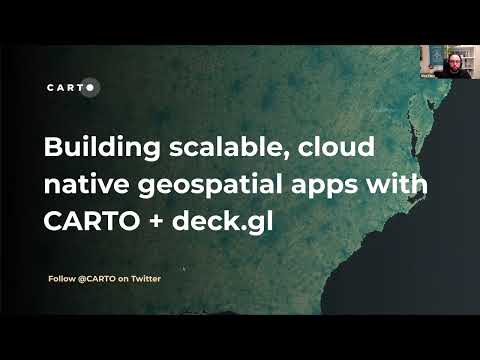

In [ ]:
#@title Teachable machine
from IPython.display import YouTubeVideo
YouTubeVideo('r1AH0DxqmT8', width=700, height=500)